# Atividade MC 2 - Implementação de Gradiente Descendente e Redes Neurais

Este notebook contém a resolução dos exercícios propostos na "MC Atividade 2". O foco é traduzir a lógica visual dos slides (StatQuest) para código Python funcional.

Bibliotecas necessárias:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Configuração para melhorar a visualização dos gráficos
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline

## Questão A: Gradiente Descendente (Regressão Linear)

**Objetivo:** Implementar o procedimento dos slides 156-213.
* **Dados:** Altura vs Peso.
* **Modelo:** `Altura = Intercepto + 0.64 * Peso` (O declive/slope é fixo em 0.64).
* **Tarefa:** Otimizar o **Intercepto** começando de 0.
* **Visualização:** Mostrar o movimento da reta e a descida na curva de custo (SSR).
* **Condições de parada:** Número máximo de iterações OU Step Size muito pequeno.


--- Iniciando Gradiente Descendente (LR: 0.1) ---
Iter 1: Old Intercept=0.000, Step Size=-0.570, New Intercept=0.570, Slope(Grad)=-5.704


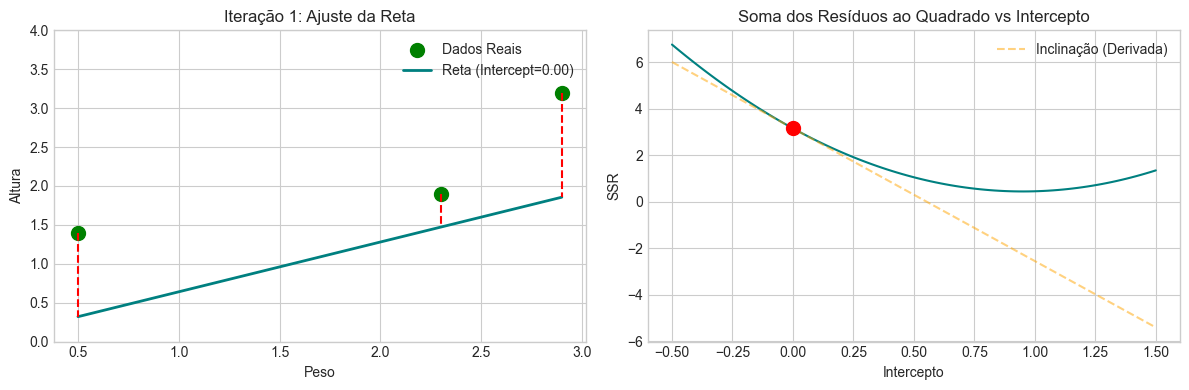

Iter 2: Old Intercept=0.570, Step Size=-0.228, New Intercept=0.799, Slope(Grad)=-2.282


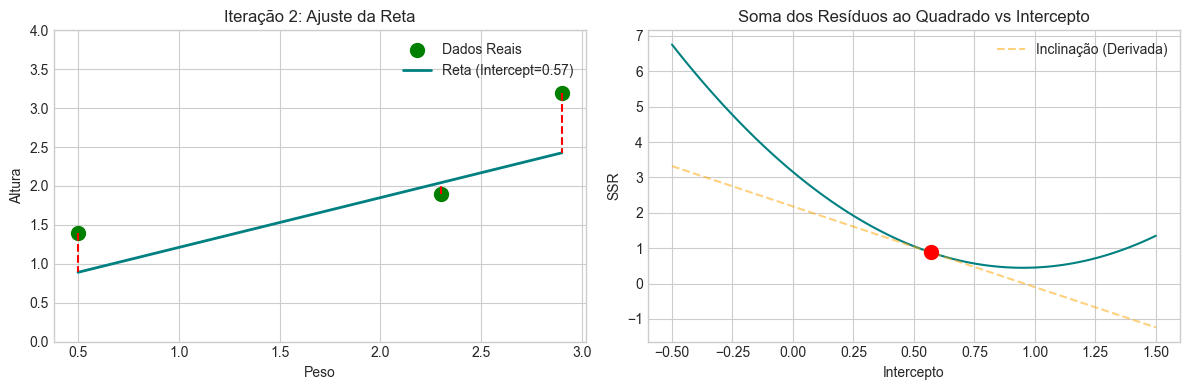

Iter 3: Old Intercept=0.799, Step Size=-0.091, New Intercept=0.890, Slope(Grad)=-0.913


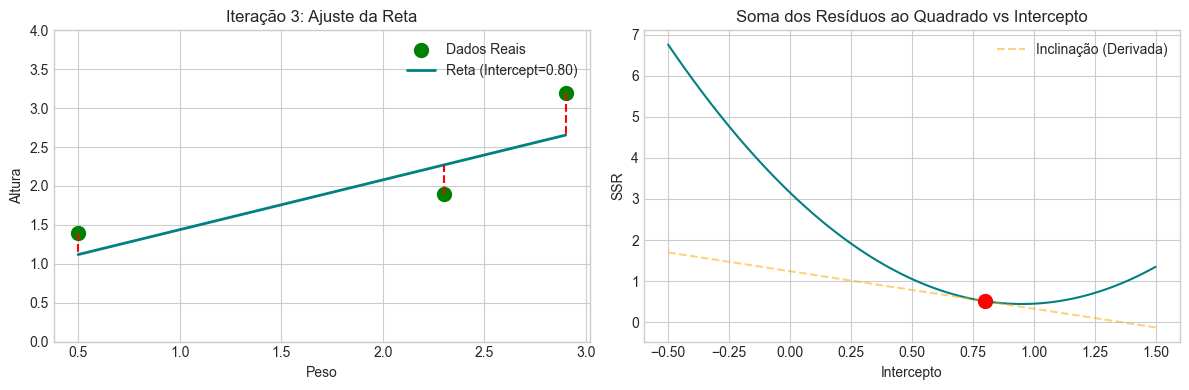

Iter 4: Old Intercept=0.890, Step Size=-0.037, New Intercept=0.926, Slope(Grad)=-0.365


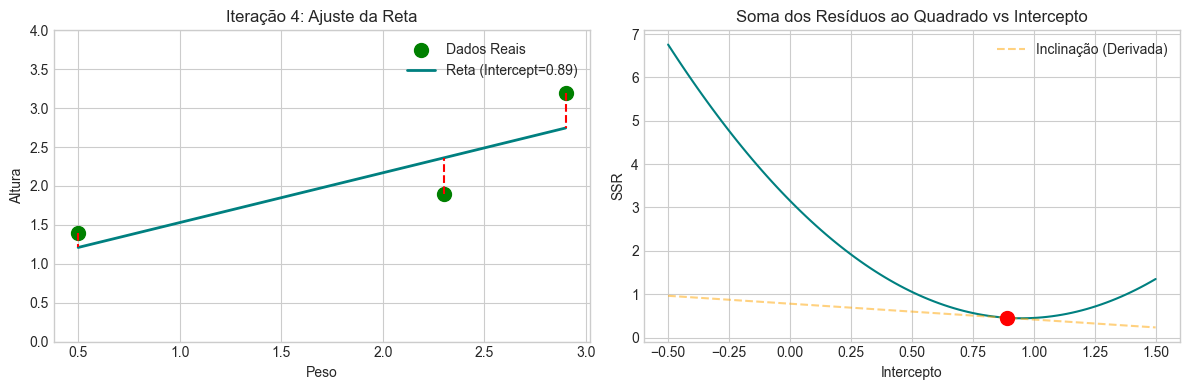

Iter 5: Old Intercept=0.926, Step Size=-0.015, New Intercept=0.941, Slope(Grad)=-0.146


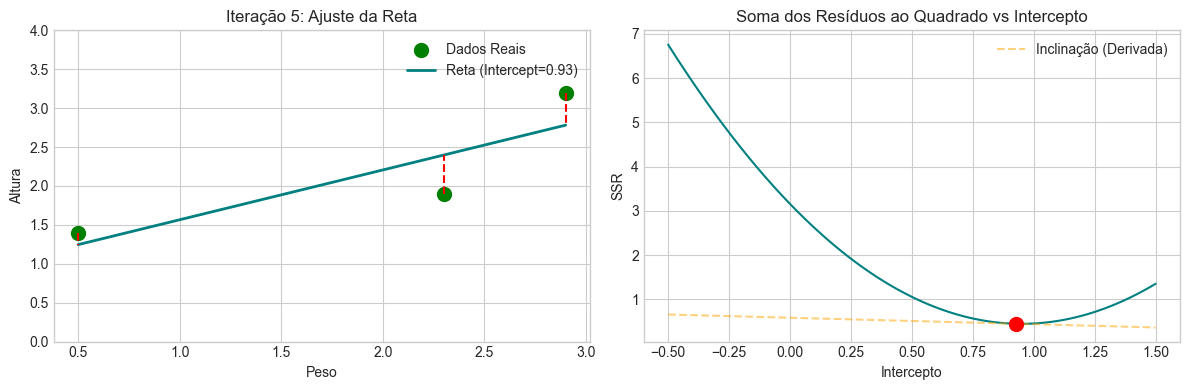

Iter 6: Old Intercept=0.941, Step Size=-0.006, New Intercept=0.947, Slope(Grad)=-0.058


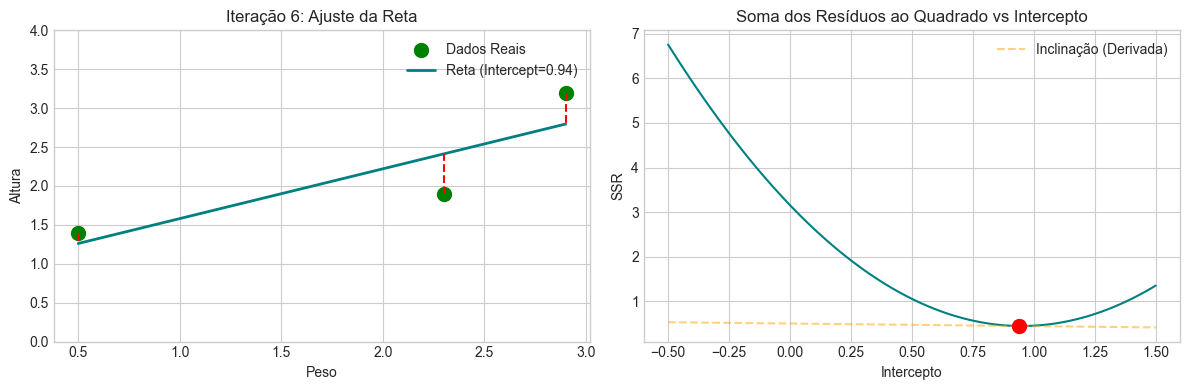

Iter 7: Old Intercept=0.947, Step Size=-0.002, New Intercept=0.949, Slope(Grad)=-0.023


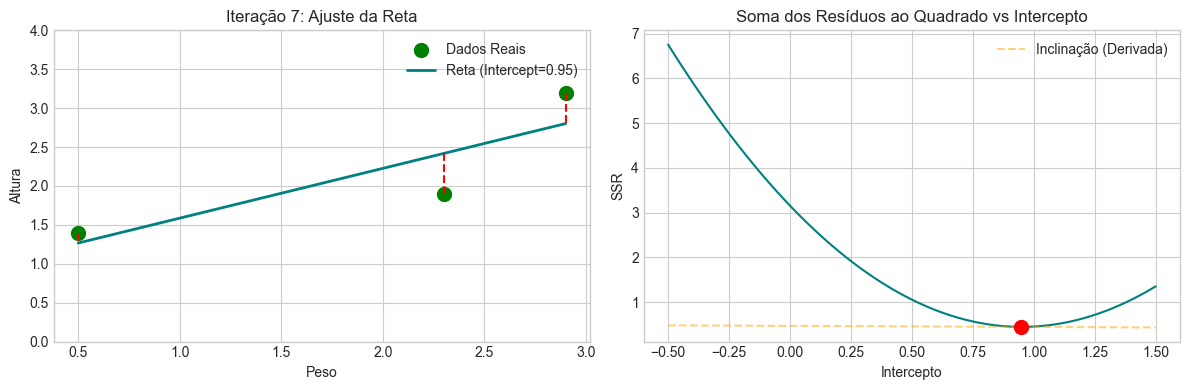

Iter 8: Old Intercept=0.949, Step Size=-0.001, New Intercept=0.950, Slope(Grad)=-0.009


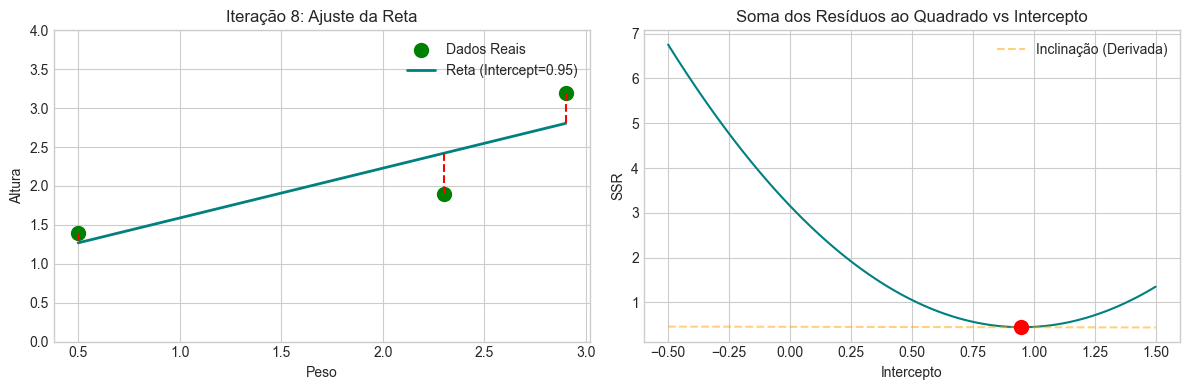

-> Convergência alcançada (Step Size pequeno).
Resultado Final para LR 0.1: Intercepto = 0.9500

--- Iniciando Gradiente Descendente (LR: 0.01) ---
Iter 1: Old Intercept=0.000, Step Size=-0.057, New Intercept=0.057, Slope(Grad)=-5.704


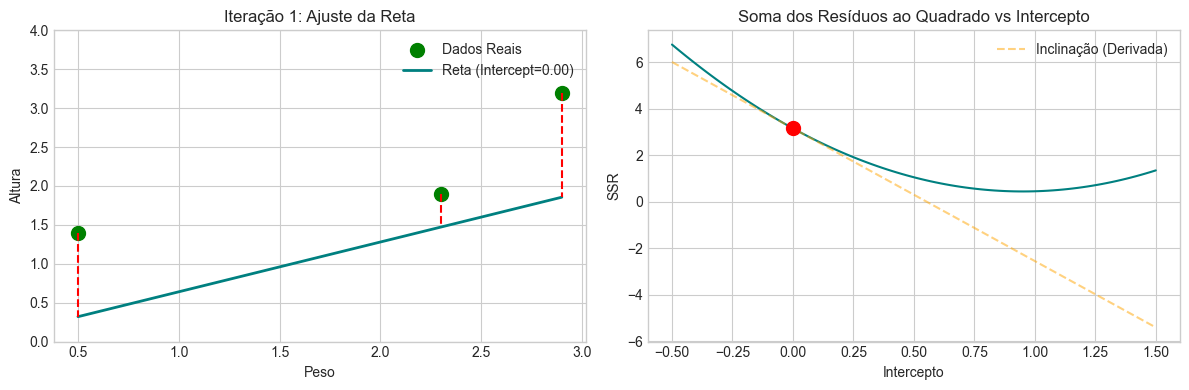

Iter 2: Old Intercept=0.057, Step Size=-0.054, New Intercept=0.111, Slope(Grad)=-5.362


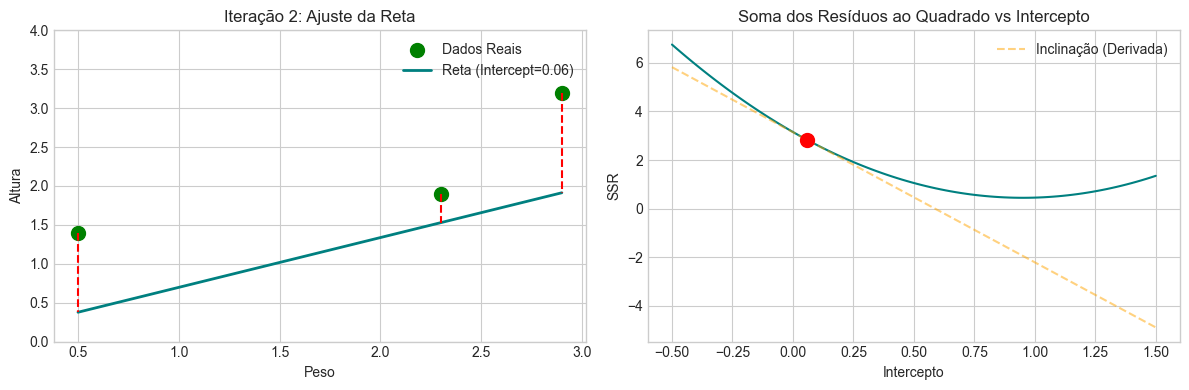

Iter 3: Old Intercept=0.111, Step Size=-0.050, New Intercept=0.161, Slope(Grad)=-5.040


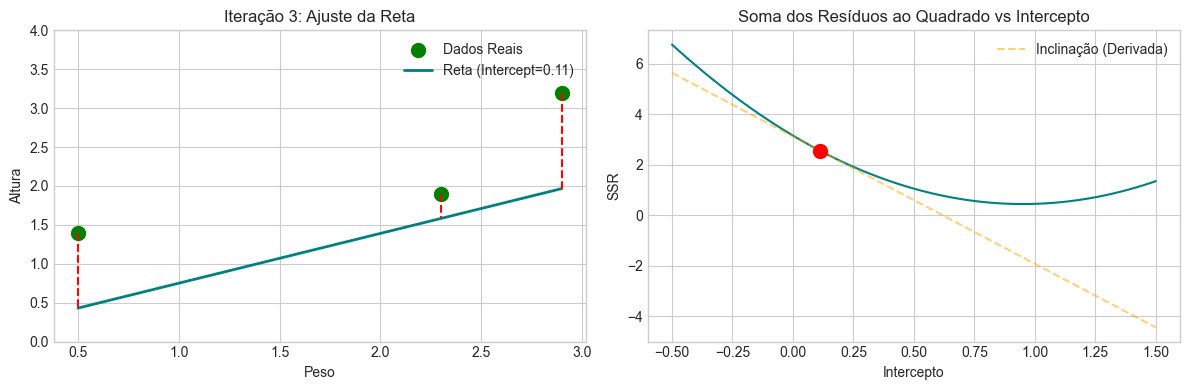

Iter 4: Old Intercept=0.161, Step Size=-0.047, New Intercept=0.208, Slope(Grad)=-4.738


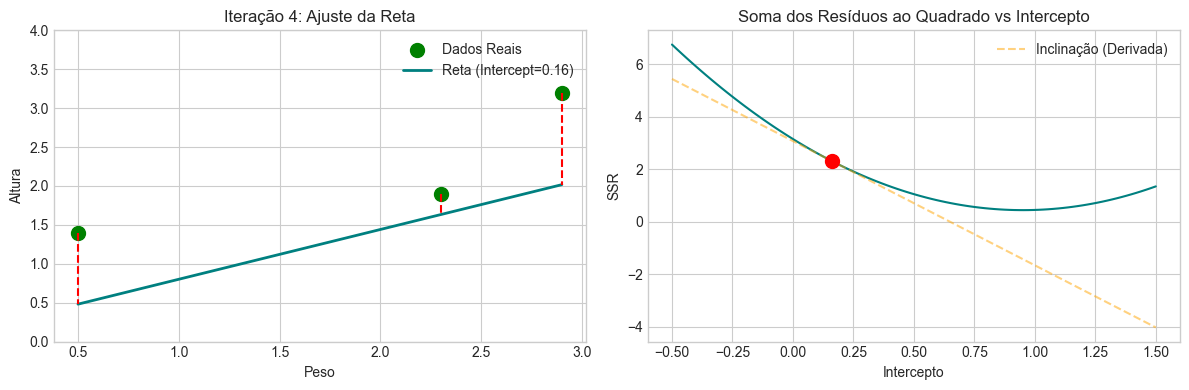

Iter 5: Old Intercept=0.208, Step Size=-0.045, New Intercept=0.253, Slope(Grad)=-4.453


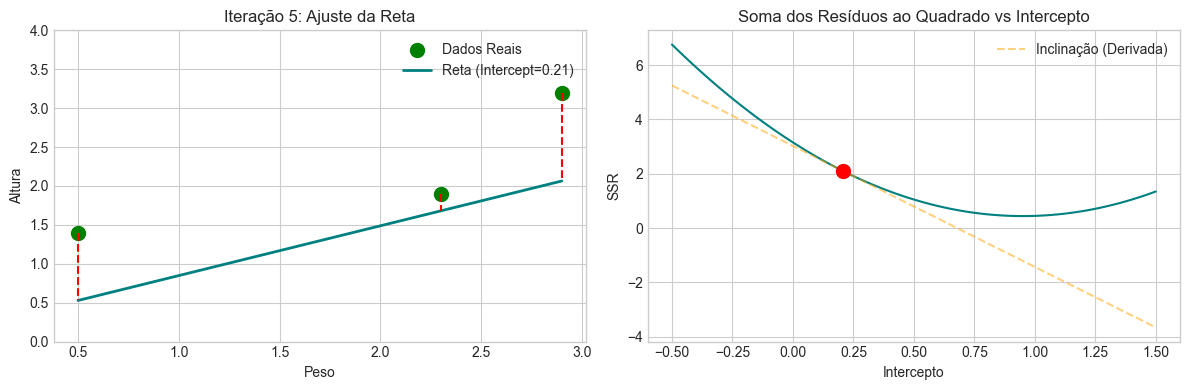

Iter 6: Old Intercept=0.253, Step Size=-0.042, New Intercept=0.295, Slope(Grad)=-4.186


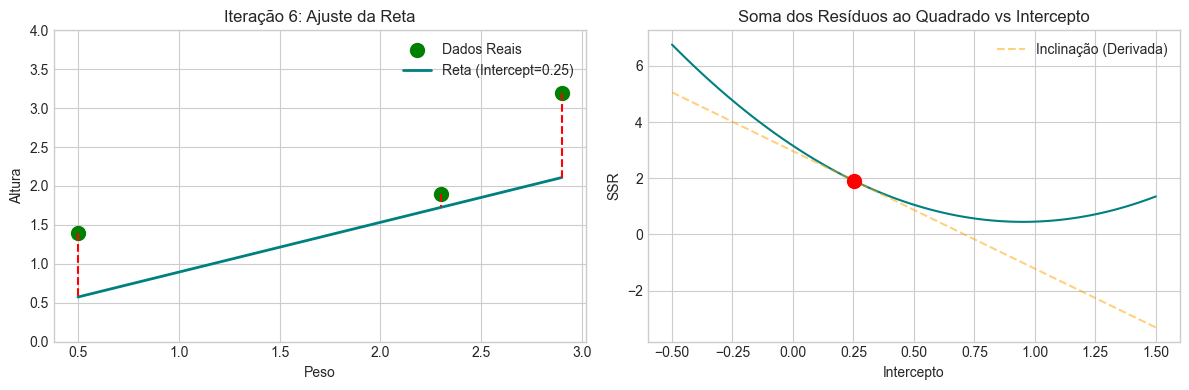

Iter 7: Old Intercept=0.295, Step Size=-0.039, New Intercept=0.334, Slope(Grad)=-3.935


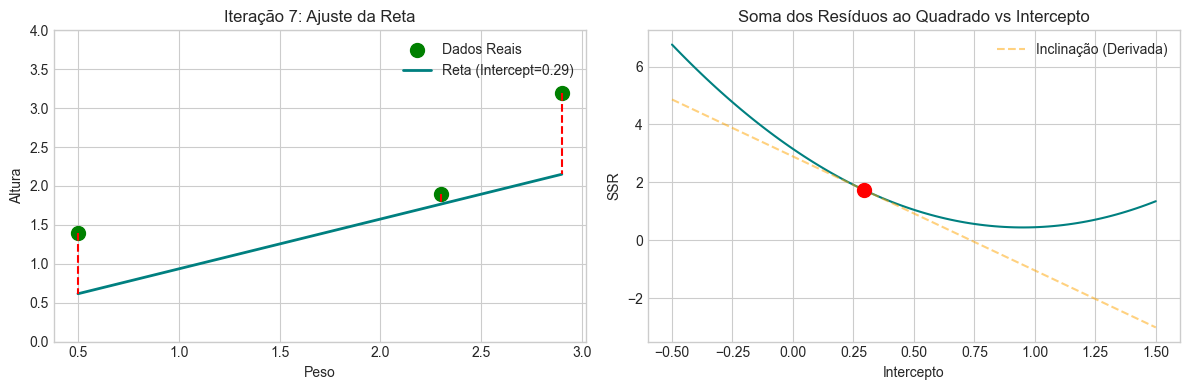

Iter 8: Old Intercept=0.334, Step Size=-0.037, New Intercept=0.371, Slope(Grad)=-3.699


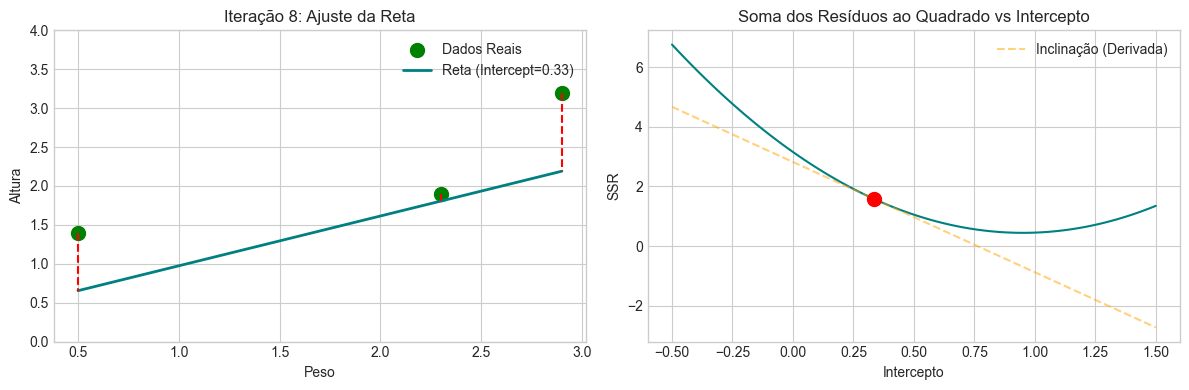

Iter 9: Old Intercept=0.371, Step Size=-0.035, New Intercept=0.406, Slope(Grad)=-3.477


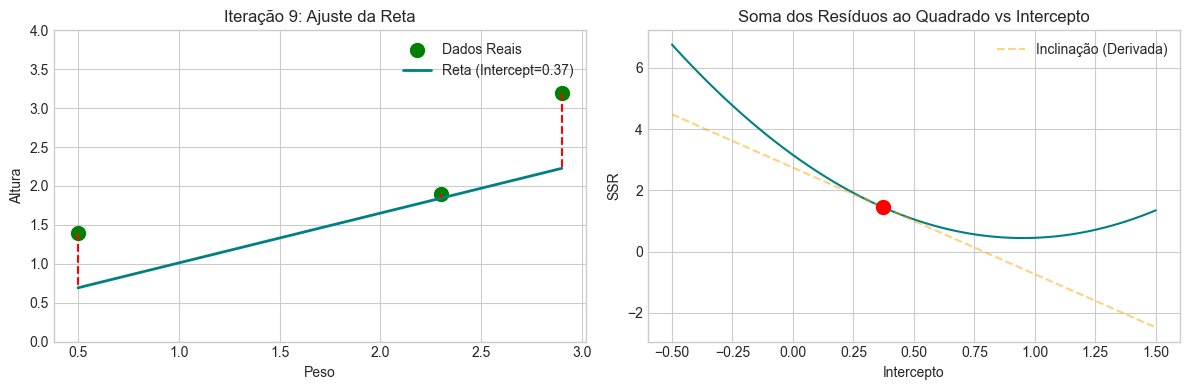

Iter 10: Old Intercept=0.406, Step Size=-0.033, New Intercept=0.439, Slope(Grad)=-3.268


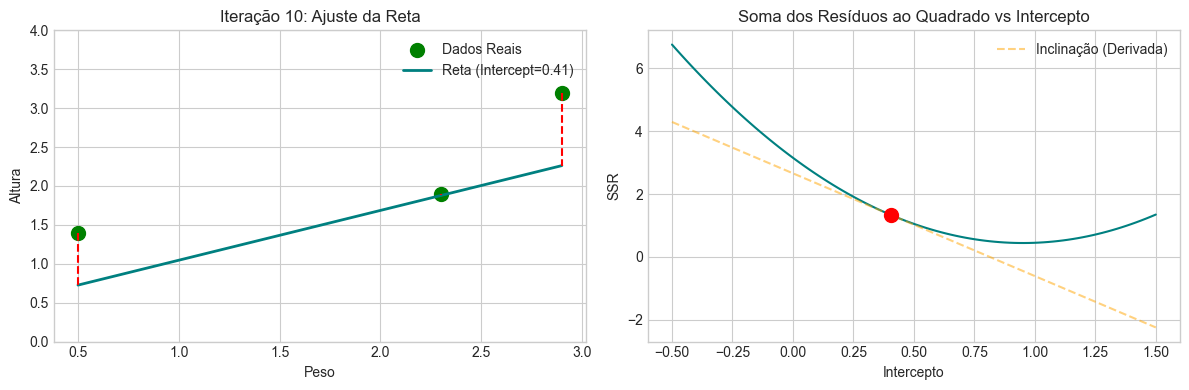

Iter 11: Old Intercept=0.439, Step Size=-0.031, New Intercept=0.469, Slope(Grad)=-3.072


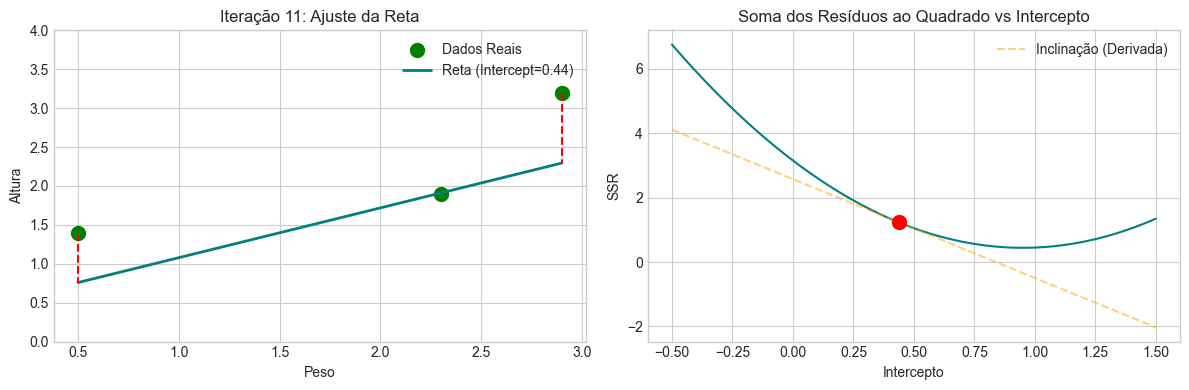

Iter 12: Old Intercept=0.469, Step Size=-0.029, New Intercept=0.498, Slope(Grad)=-2.888


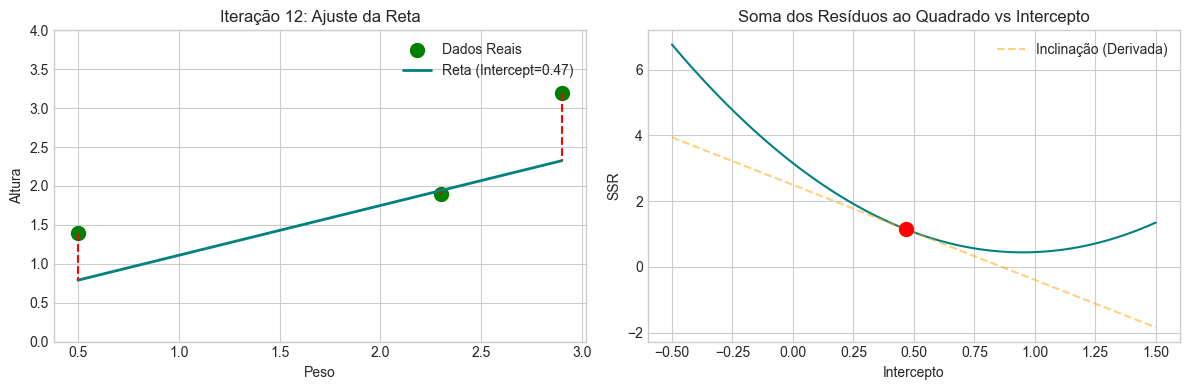

Iter 13: Old Intercept=0.498, Step Size=-0.027, New Intercept=0.525, Slope(Grad)=-2.715


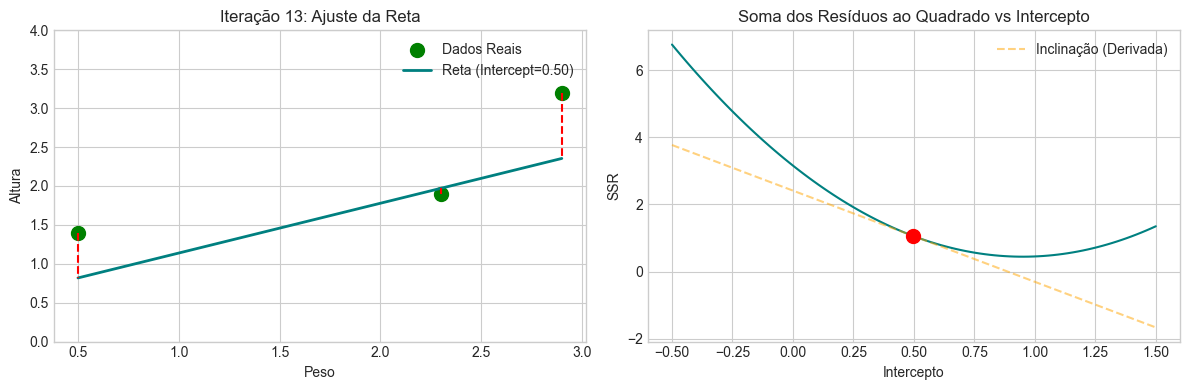

Iter 14: Old Intercept=0.525, Step Size=-0.026, New Intercept=0.551, Slope(Grad)=-2.552


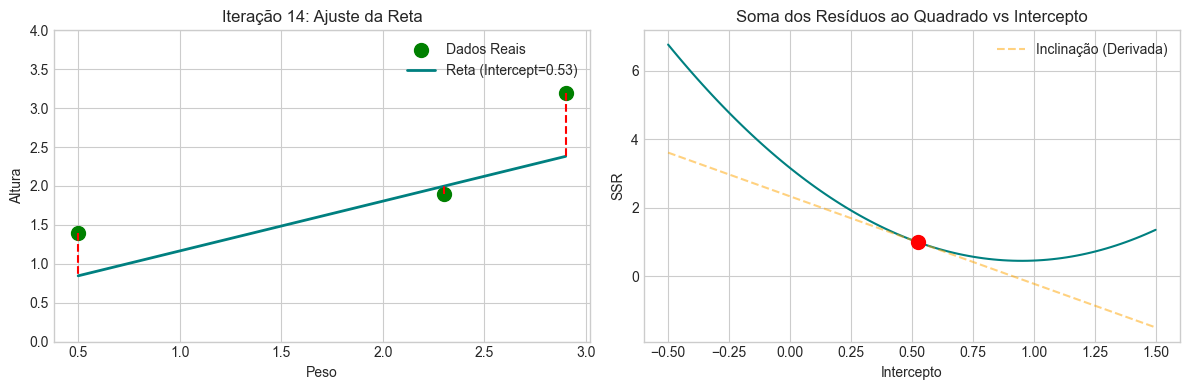

Iter 15: Old Intercept=0.551, Step Size=-0.024, New Intercept=0.575, Slope(Grad)=-2.399


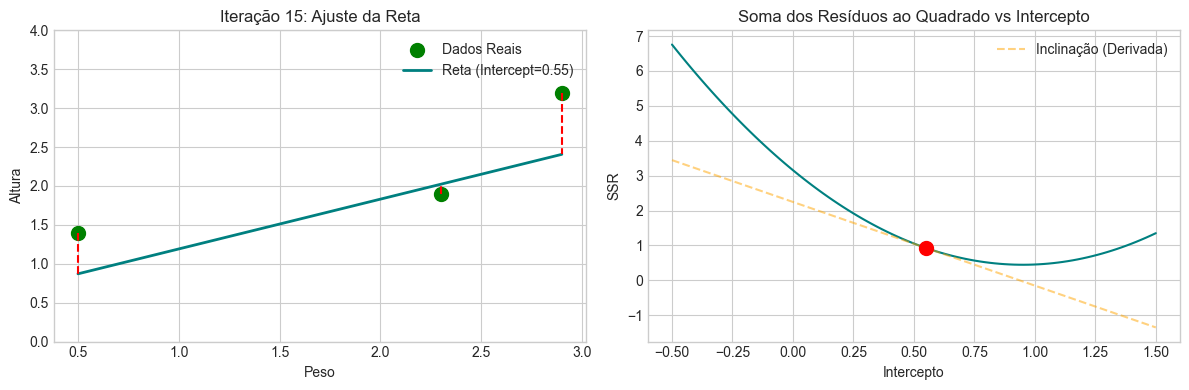

Iter 16: Old Intercept=0.575, Step Size=-0.023, New Intercept=0.597, Slope(Grad)=-2.255


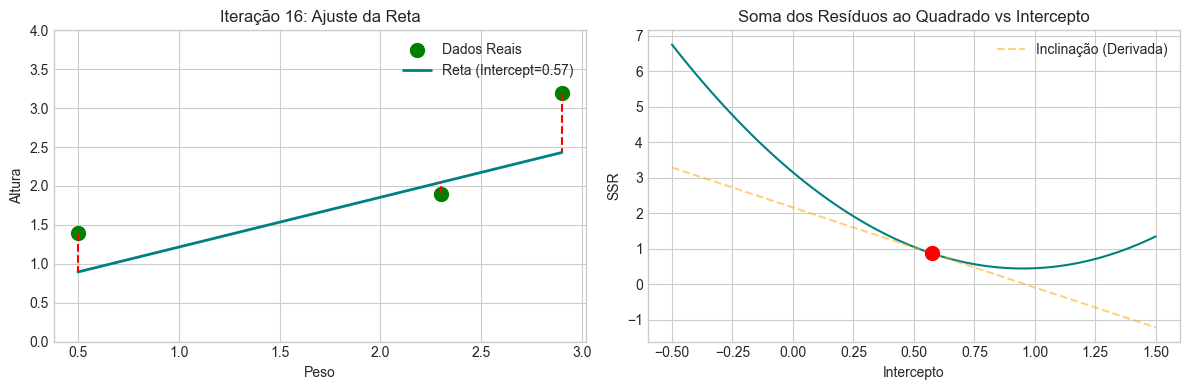

Iter 17: Old Intercept=0.597, Step Size=-0.021, New Intercept=0.619, Slope(Grad)=-2.119


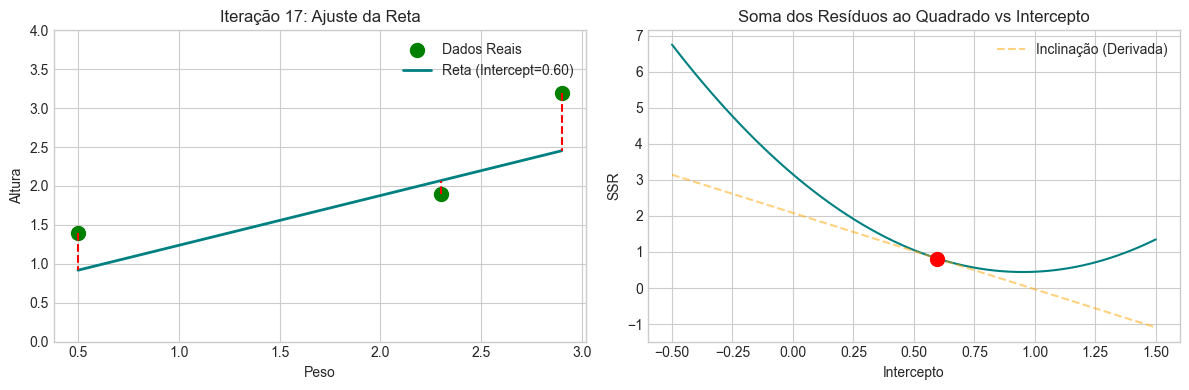

Iter 18: Old Intercept=0.619, Step Size=-0.020, New Intercept=0.639, Slope(Grad)=-1.992


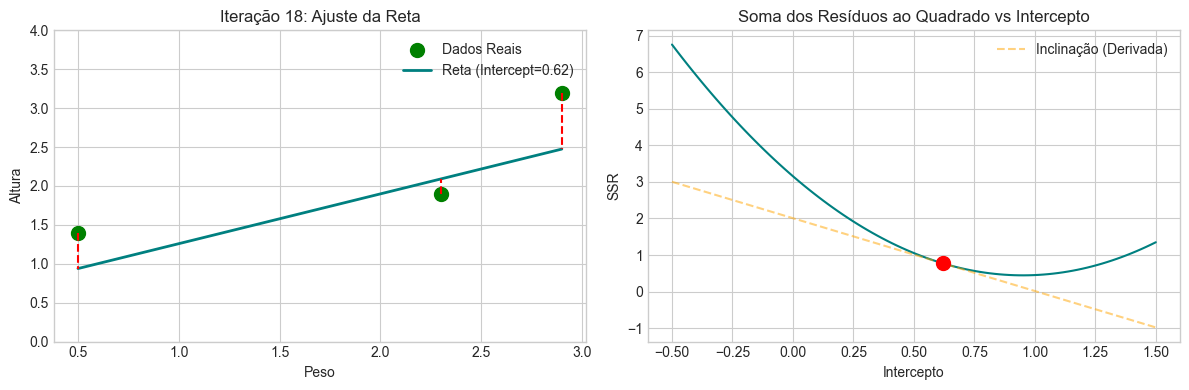

Iter 19: Old Intercept=0.639, Step Size=-0.019, New Intercept=0.657, Slope(Grad)=-1.873


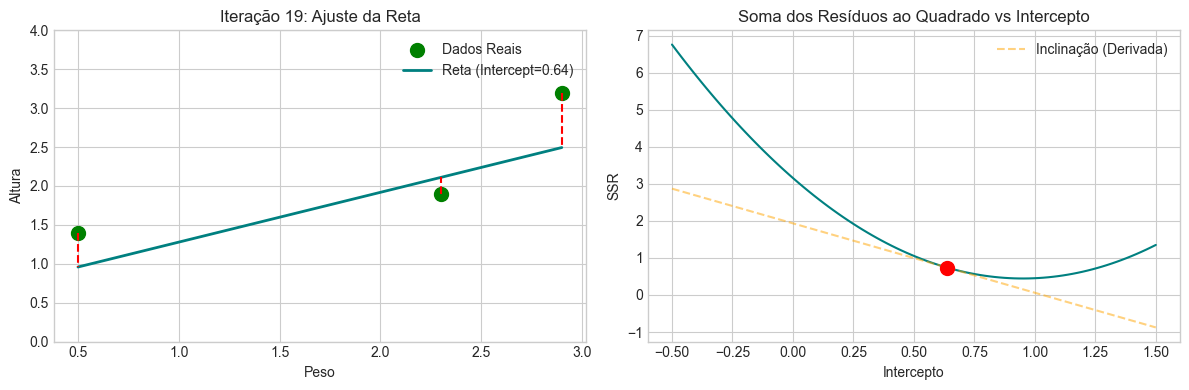

Iter 20: Old Intercept=0.657, Step Size=-0.018, New Intercept=0.675, Slope(Grad)=-1.760


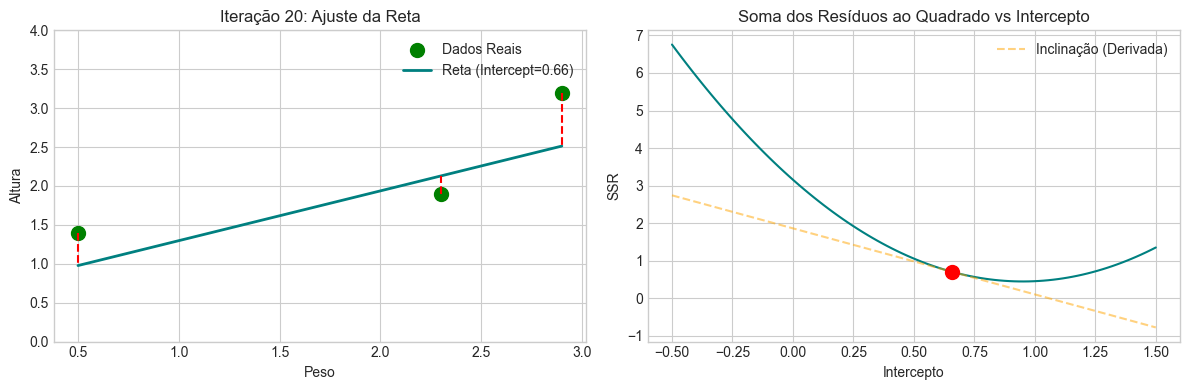

Resultado Final para LR 0.01: Intercepto = 0.6749


In [10]:
def run_question_a(learning_rate, max_iter=20, tolerance=0.001):
    #dados do slide 
    weights = np.array([0.5, 2.3, 2.9])
    heights = np.array([1.4, 1.9, 3.2])
    
    #parâmetros Iniciais que foram definidos no slide
    slope_fixed = 0.64
    intercept = 0.0  # Começa em 0 conforme o slide
    
    #para plotagem da curva de custo
    intercept_vals = np.linspace(-0.5, 1.5, 100)
    ssr_vals = []
    for i in intercept_vals:
        predicted = i + slope_fixed * weights
        residuals = heights - predicted
        ssr_vals.append(np.sum(residuals**2))
        
    print(f"\n--- Iniciando Gradiente Descendente (LR: {learning_rate}) ---")
    
    #loop para otimização do intercepto
    for i in range(max_iter):
        #calcular Predições e Derivada
        predicted_heights = intercept + slope_fixed * weights
        
        #calculo do predicted e da derivada
        residuals = heights - predicted_heights
        derivative = np.sum(-2 * residuals)
        
        # calcular Step Size
        step_size = derivative * learning_rate
        
        #guardar valor antigo para impressão
        old_intercept = intercept
        
        #atualizar intercept
        new_intercept = old_intercept - step_size
        
        print(f"Iter {i+1}: Old Intercept={old_intercept:.3f}, Step Size={step_size:.3f}, New Intercept={new_intercept:.3f}, Slope(Grad)={derivative:.3f}")
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))
        
        #grafico da reta de regressão
        axes[0].scatter(weights, heights, color='green', s=100, label='Dados Reais')
        axes[0].plot(weights, predicted_heights, color='teal', linewidth=2, label=f'Reta (Intercept={old_intercept:.2f})')

        for w, h, p in zip(weights, heights, predicted_heights):
            axes[0].plot([w, w], [h, p], color='red', linestyle='--')
        axes[0].set_title(f"Iteração {i+1}: Ajuste da Reta")
        axes[0].set_xlabel("Peso")
        axes[0].set_ylabel("Altura")
        axes[0].legend()
        axes[0].set_ylim(0, 4)
        
        # Gráfico da curva de custo
        current_ssr = np.sum((heights - (old_intercept + slope_fixed * weights))**2)
        axes[1].plot(intercept_vals, ssr_vals, color='teal')
        axes[1].scatter(old_intercept, current_ssr, color='red', s=100, zorder=5)
        #tangente (visualização do gradiente)
        tangent_line = derivative * (intercept_vals - old_intercept) + current_ssr
        axes[1].plot(intercept_vals, tangent_line, color='orange', linestyle='--', alpha=0.5, label='Inclinação (Derivada)')
        
        axes[1].set_title(f"Soma dos Resíduos ao Quadrado vs Intercepto")
        axes[1].set_xlabel("Intercepto")
        axes[1].set_ylabel("SSR")
        axes[1].legend()
        
        plt.tight_layout()
        plt.show()
        
        intercept = new_intercept
        
        #condição de parada 2: step size muito pequeno
        if abs(step_size) < tolerance:
            print("-> Convergência alcançada (Step Size pequeno).")
            break
            
    print(f"Resultado Final para LR {learning_rate}: Intercepto = {intercept:.4f}")


run_question_a(learning_rate=0.1)

run_question_a(learning_rate=0.01)

## Questão B: Gradiente Descendente Estocástico e Mini-Batch

**Objetivo:** Transformar o procedimento dos slides 302-335 em código.
* **Diferença:** Não atualizar usando a soma de *todos* os dados de uma vez, mas sim amostra por amostra (Estocástico) ou em pequenos grupos (Mini-batch).
* **Nota:** O gráfico complexo da Questão A não será gerado aqui, focaremos na convergência.

### B-1: Gradiente Descendente Estocástico (SGD)
Atualiza o intercepto após calcular o erro para **cada** amostra individualmente.

In [11]:
def run_sgd(learning_rate=0.1, epochs=5):
    weights = np.array([0.5, 2.3, 2.9])
    heights = np.array([1.4, 1.9, 3.2])
    slope_fixed = 0.64
    intercept = 0.0
    
    print(f"--- SGD (Learning Rate: {learning_rate}) ---")
    
    for epoch in range(epochs):
        indices = np.arange(len(weights))
        np.random.shuffle(indices)
        
        print(f"Época {epoch+1}:")
        
        for i in indices:
            w = weights[i]
            h = heights[i]
            
            pred = intercept + slope_fixed * w

            derivative = -2 * (h - pred)

            step_size = derivative * learning_rate
            
            old_intercept = intercept
            intercept = intercept - step_size
            
            print(f"   Amostra (w={w}): Old={old_intercept:.3f}, Step={step_size:.3f}, New={intercept:.3f}")

        return intercept

final_intercept_sgd = run_sgd()
print(f"Final SGD Intercept= {final_intercept_sgd:.4f}")

--- SGD (Learning Rate: 0.1) ---
Época 1:
   Amostra (w=2.3): Old=0.000, Step=-0.086, New=0.086
   Amostra (w=2.9): Old=0.086, Step=-0.252, New=0.337
   Amostra (w=0.5): Old=0.337, Step=-0.149, New=0.486
Final SGD Intercept= 0.4858


### B-2: Gradiente Descendente Mini-Batch
Adaptação para usar **mini-batch de 2 samples**.

In [12]:
def run_minibatch(learning_rate=0.1, epochs=5, batch_size=2):
    weights = np.array([0.5, 2.3, 2.9])
    heights = np.array([1.4, 1.9, 3.2])
    slope_fixed = 0.64
    intercept = 0.0

    print(f"--- Mini-batch GD (Batch Size: {batch_size}) ---")

    for epoch in range(epochs):
        indices = np.arange(len(weights))
        np.random.shuffle(indices)

        #vai criar as batches
        for start_idx in range(0, len(weights), batch_size):
            end_idx = start_idx + batch_size
            batch_indices = indices[start_idx:end_idx]

            #dados da batch
            w_batch = weights[batch_indices]
            h_batch = heights[batch_indices]

            #predicao e derivada somada para o batch
            pred_batch = intercept + slope_fixed * w_batch
            residuals = h_batch - pred_batch
            derivative = np.sum(-2 * residuals)

            step_size = derivative * learning_rate

            old_intercept = intercept
            intercept = intercept - step_size

            print(f'Epoch {epoch+1}, Batch: Old={old_intercept:.3f}, Step={step_size:.3f}, New={intercept:.3f}')
        
        return intercept

final_intercept_batch = run_minibatch()
print(f"Final Mini-batch Intercept= {final_intercept_batch:.4f}")

--- Mini-batch GD (Batch Size: 2) ---
Epoch 1, Batch: Old=0.000, Step=-0.485, New=0.485
Epoch 1, Batch: Old=0.485, Step=0.011, New=0.473
Final Mini-batch Intercept= 0.4734
